In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import sem

In [2]:
# reading file content
df = pd.read_csv("./Resources/cleaned_df.csv")

### Exploring the Cleaning

In [3]:
# The structure of the dataset
df.info()
# total 10 columns. All non-null, 307122 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307122 entries, 0 to 307121
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dateCrawled         307122 non-null  object
 1   name                307122 non-null  object
 2   price               307122 non-null  int64 
 3   vehicleType         307122 non-null  object
 4   yearOfRegistration  307122 non-null  int64 
 5   model               307122 non-null  object
 6   kilometer           307122 non-null  int64 
 7   fuelType            307122 non-null  object
 8   brand               307122 non-null  object
 9   lastSeen            307122 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.4+ MB


In [4]:
df.describe()

# Interquartile distribution doesn`t seem satisfactory for now.

,price,yearOfRegistration,kilometer
count,3.071220e+05,307122.000000,307122.000000
mean,9.404320e+03,2002.903706,125391.180052
std,5.192426e+05,6.597030,39347.308065
min,0.000000e+00,1910.000000,5000.000000
25%,1.399000e+03,1999.000000,100000.000000
50%,3.450000e+03,2003.000000,150000.000000
75%,7.980000e+03,2007.000000,150000.000000
max,1.000000e+08,2018.000000,150000.000000


In [5]:
# Getting the dimensions
df.shape

(307122, 10)

In [6]:
# Renaming dateCrawled to offeringDate
df.rename(columns={'dateCrawled': 'offeringDate'}, inplace=True)
# Listing out the columns
df.columns

Index(['offeringDate', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'model', 'kilometer', 'fuelType', 'brand', 'lastSeen'],
      dtype='object')

In [7]:
df.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39


Some entries for vehicleType are in German, converting them to English. 

In [8]:
df['vehicleType'] = df['vehicleType'].replace({'andere' : 'other','kombi' : 'station','kleinwagen': 'sedan',
                                               'cabrio': 'convertable','limousine': 'luxury'})
df.vehicleType.unique()


array(['suv', 'sedan', 'luxury', 'convertable', 'bus', 'station', 'coupe',
       'other'], dtype=object)

In [9]:
# Duplicates
 
duplicate_rows = df[df.duplicated()]

duplicate_rows # I don`t think there is a need to drop as they are not too much. 

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
129403,2016-03-07 12:00:46,Golf_7_Variant__184_PS__Erstzulassung_2013__53...,10000,station,2013,golf,60000,diesel,volkswagen,2016-03-20 12:49:27
148340,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,1799,coupe,1999,clk,20000,benzin,mercedes_benz,2016-03-09 09:46:57
200383,2016-03-28 00:56:10,Suzuki_Ignis,1000,sedan,2002,andere,150000,benzin,suzuki,2016-03-28 08:46:21
223758,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,4699,coupe,2003,clk,125000,benzin,mercedes_benz,2016-04-07 09:44:54
282289,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,1999,station,2001,passat,150000,diesel,volkswagen,2016-03-18 18:46:15


## Research Questions to Answer

### - What is the least and most popular car type being sold?
#### - Using date of registration, which model year is most purchased.

In [10]:
# Storing "group by vehicleType" and its count for each vehicleType in vehTypeCount
veh_Type_Count = df['vehicleType'].value_counts() # vehicleType: the index & counts: the values
veh_Type_Count

luxury         89153
sedan          72663
station        62599
bus            28348
convertable    21076
coupe          17157
suv            13497
other           2629
Name: vehicleType, dtype: int64

In [11]:
veh_Type_Count.dtypes

dtype('int64')

In [12]:
# Sorting vehTypeCount in ascending order
type_Count_Sorted = veh_Type_Count.sort_values(ascending=True)
type_Count_Sorted

other           2629
suv            13497
coupe          17157
convertable    21076
bus            28348
station        62599
sedan          72663
luxury         89153
Name: vehicleType, dtype: int64

In [13]:
# Most & least popular vehicle
most_popular = type_Count_Sorted.max()
most_popular

89153

In [14]:
least_popular = type_Count_Sorted.min()
least_popular

2629

In [15]:
# Model year most purchased based on the date of registration
# convert to numeric
df['yearOfRegistration'] = pd.to_numeric(df['yearOfRegistration'], errors='coerce')

# Group by year and count 
year_counts = df['yearOfRegistration'].value_counts() 
year_counts

1999    20247
2006    18872
2005    18635
2004    18584
2003    18542
        ...  
1939        2
1933        2
1948        1
1919        1
1928        1
Name: yearOfRegistration, Length: 92, dtype: int64

In [16]:
most_purchased_model = year_counts.max()

print("Least popular car type: ", least_popular)
print("Most popular car type: ", most_popular)
print("Most purchased model year: ", most_purchased_model)

Least popular car type:  2629
Most popular car type:  89153
Most purchased model year:  20247


##### Visualizing vehicle type count

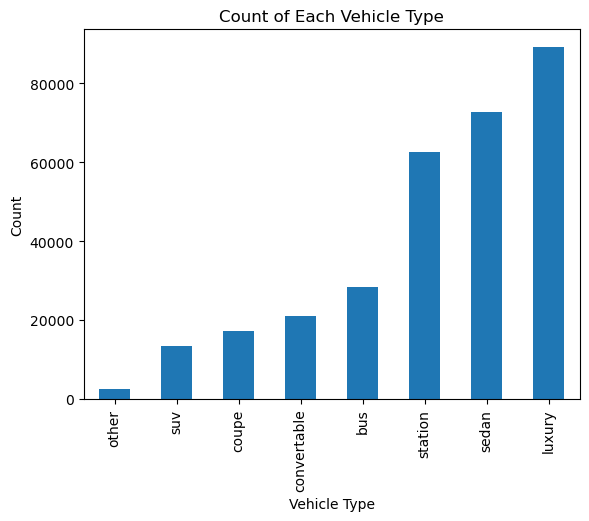

In [17]:
# Using horizontal bar plot 
type_Count_Sorted.plot.bar()
plt.ylabel('Count')
plt.xlabel('Vehicle Type')
plt.title('Count of Each Vehicle Type')
plt.show()

In [18]:
# Bins
bins = [0, 1500, 3000, 4500, 6000, 7500, float('inf')]
labels = ['<1500', '1500-3000', '3000-4500', '4500-6000', '6000-7500', '7500+']

# Assign range as per bins on price column. 
# Group by vehicleType & priceRange. Number of sales, typical selling price/each group. 
df['priceRange'] = pd.cut(df['price'], bins=bins, labels=labels) # range stored in priceRange.
df['priceRange']

0             7500+
1             <1500
2         3000-4500
3             <1500
4         1500-3000
            ...    
307117        <1500
307118        <1500
307119        7500+
307120    3000-4500
307121        7500+
Name: priceRange, Length: 307122, dtype: category
Categories (6, object): ['<1500' < '1500-3000' < '3000-4500' < '4500-6000' < '6000-7500' < '7500+']

In [19]:
# grouping by price range
category_df = df.groupby(['vehicleType', 'priceRange']).agg({'price': ['count', 'median']}).reset_index()
#renaming for clarity
category_df.columns =  ['vehicleType', 'priceRange', 'salesCount', 'medianPrice']

category_df.head(100)

,vehicleType,priceRange,salesCount,medianPrice
0,bus,<1500,4045,999.0
1,bus,1500-3000,5434,2350.0
2,bus,3000-4500,4334,3800.0
3,bus,4500-6000,3461,5300.0
4,bus,6000-7500,2363,6899.0
5,bus,7500+,8390,12199.5
6,convertable,<1500,1796,999.0
7,convertable,1500-3000,3046,2400.0
8,convertable,3000-4500,2766,3800.0
9,convertable,4500-6000,2179,5400.0


In [20]:
rx_axis = category_df['vehicleType']
rx_axis

0             bus
1             bus
2             bus
3             bus
4             bus
5             bus
6     convertable
7     convertable
8     convertable
9     convertable
10    convertable
11    convertable
12          coupe
13          coupe
14          coupe
15          coupe
16          coupe
17          coupe
18         luxury
19         luxury
20         luxury
21         luxury
22         luxury
23         luxury
24          other
25          other
26          other
27          other
28          other
29          other
30          sedan
31          sedan
32          sedan
33          sedan
34          sedan
35          sedan
36        station
37        station
38        station
39        station
40        station
41        station
42            suv
43            suv
44            suv
45            suv
46            suv
47            suv
Name: vehicleType, dtype: object

In [21]:
ry_axis = category_df['salesCount']
ry_axis

0      4045
1      5434
2      4334
3      3461
4      2363
5      8390
6      1796
7      3046
8      2766
9      2179
10     1730
11     9319
12     3079
13     2619
14     1705
15     1308
16      881
17     7149
18    22415
19    18115
20    10241
21     7246
22     5777
23    23780
24      856
25      555
26      339
27      212
28      121
29      411
30    33498
31    15453
32     8040
33     5186
34     3252
35     5871
36    15069
37    12359
38     7367
39     5317
40     4187
41    17200
42      541
43     1005
44     1073
45     1076
46      917
47     8739
Name: salesCount, dtype: int64

In [22]:
labels2 = [1500,3000,4500,6000,7500,100000]
color_range = list(labels2)
color_range

[1500, 3000, 4500, 6000, 7500, 100000]

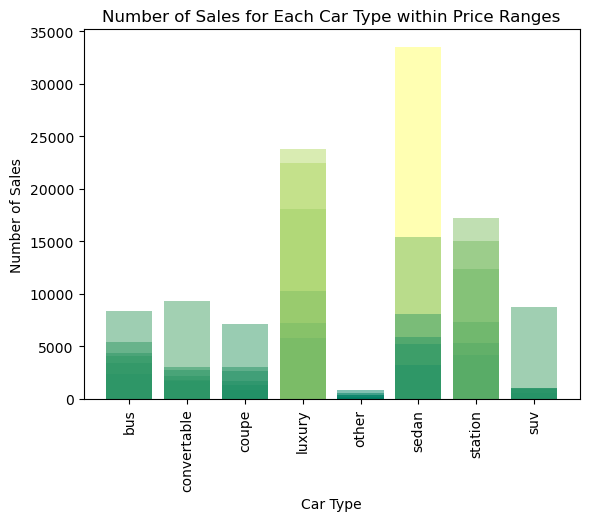

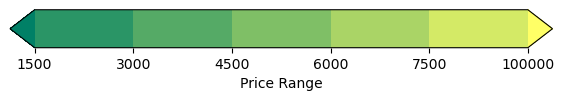

In [23]:
# Bar plot for sales to price 

fig = plt.figure()
my_cmap = plt.colormaps.get_cmap('summer')
rescale = lambda y: (ry_axis - min(ry_axis)) / (max(ry_axis) - min(ry_axis))
plt.bar(rx_axis, ry_axis, color=my_cmap(rescale(ry_axis)), alpha = .5)
plt.title('Number of Sales for Each Car Type within Price Ranges')
plt.xlabel('Car Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation = "vertical")

fig, ax = plt.subplots(figsize=(7, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.summer
bounds = color_range
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Price Range")


plt.show()